In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Sales Data.csv',encoding='latin1')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [3]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [6]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Product Category,0
Product Name,0
Units Sold,0
Unit Price,0
Total Revenue,0
Region,0
Payment Method,0


In [7]:
c=df[df['Unit Price']>=100].sort_values(by='Unit Price',ascending=True)
c.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
82,10083,23-03-2024,Beauty Products,Charlotte Tilbury Magic Cream,1,100.00,100.00,Europe,PayPal
64,10065,05-03-2024,Beauty Products,Lancome La Vie Est Belle,1,102.00,102.00,Europe,PayPal
88,10089,29-03-2024,Beauty Products,Sunday Riley Good Genes,1,105.00,105.00,Europe,PayPal
40,10041,10-02-2024,Beauty Products,Estee Lauder Advanced Night Repair,1,105.00,105.00,Europe,PayPal
101,10102,11-04-2024,Sports,Under Armour HOVR Sonic 4 Shoes,2,109.99,219.98,Asia,Credit Card


In [8]:
gp=df[['Product Category','Total Revenue']].groupby('Product Category')
s=gp.sum()
s

,Total Revenue
Product Category,
Beauty Products,2621.90
Books,1861.93
Clothing,8128.93
Electronics,34982.41
Home Appliances,18646.16
Sports,14326.52


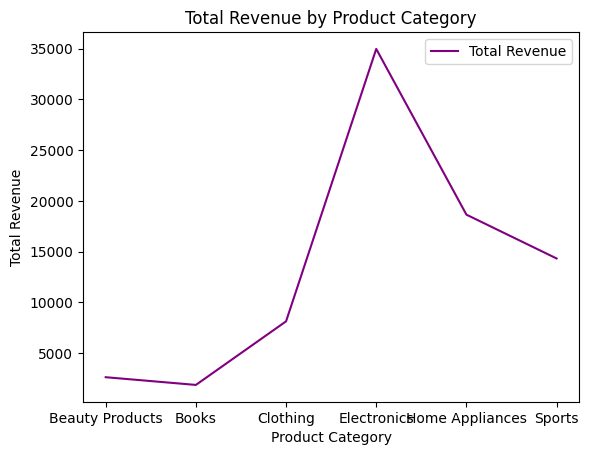

In [20]:

s.plot(kind='line', color=['purple'])
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.show()

In [10]:
sales_by_category = df.groupby('Product Category')['Units Sold'].sum()
sales_by_category

,Units Sold
Product Category,
Beauty Products,46
Books,114
Clothing,145
Electronics,66
Home Appliances,59
Sports,88


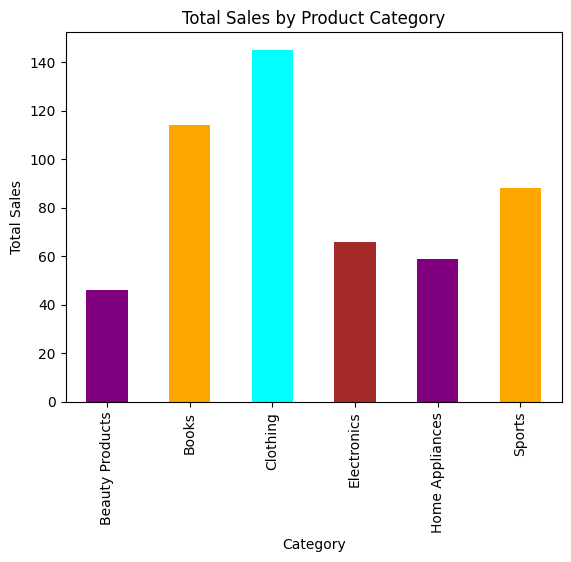

In [12]:

sales_by_category.plot(kind='bar', color=['purple', 'orange', 'cyan', 'brown'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.show()

In [15]:
rg=df[['Region','Total Revenue']].groupby('Region')
a=rg.sum()
a

,Total Revenue
Region,
Asia,22455.45
Europe,21268.06
North America,36844.34


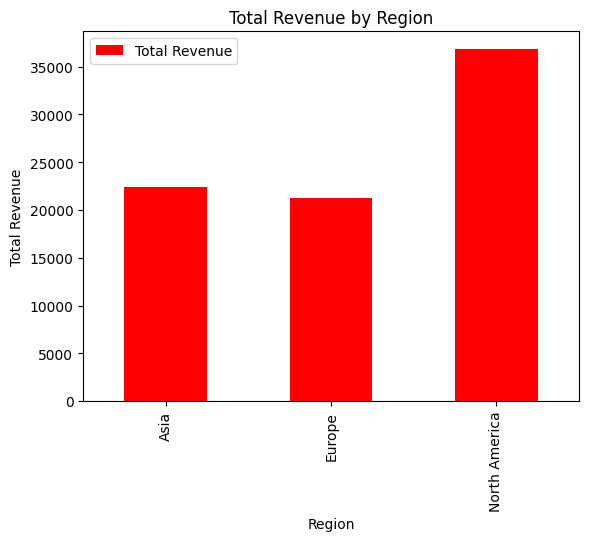

In [17]:
a.plot(kind='bar', color=['red'])
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.show()

In [21]:
rp=df[['Region','Product Category']].groupby('Region')
p=rp.max()
p

,Product Category
Region,
Asia,Sports
Europe,Home Appliances
North America,Electronics


In [22]:
rp.min()

,Product Category
Region,
Asia,Clothing
Europe,Beauty Products
North America,Books


In [23]:
sum(df['Total Revenue'])

80567.85000000008

In [24]:
da=df[['Date','Total Revenue']].groupby('Total Revenue')
dm=da.max()
Sm=dm.sort_values(by='Total Revenue',ascending=False)
Sm.head()

,Date
Total Revenue,
3899.99,12-04-2024
2599.98,26-03-2024
2499.99,07-01-2024
2399.00,04-08-2024
1999.98,01-01-2024


In [25]:
da=df[['Date','Total Revenue']].groupby('Total Revenue')
d=da.min()
S=d.sort_values(by='Total Revenue',ascending=True)
S.head()

,Date
Total Revenue,
6.50,16-04-2024
6.70,14-08-2024
6.80,16-05-2024
15.00,22-04-2024
16.99,15-06-2024


In [43]:

df['Date']=pd.to_datetime(df['Date'],format='%d%m%y')
df['Day']=df['Date'].dt.day_name()
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Day
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,Monday
1,10002,2024-02-01,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,Thursday
2,10003,2024-03-01,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,Friday
3,10004,2024-04-01,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,Monday
4,10005,2024-05-01,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,Wednesday


In [46]:

day=df[['Day','Total Revenue']].groupby('Day')
t=day.sum()
st=t.sort_values(by='Total Revenue',ascending=False)
st.head()

,Total Revenue
Day,
Monday,14713.29
Wednesday,14508.16
Tuesday,12340.11
Saturday,11811.18
Thursday,11801.16


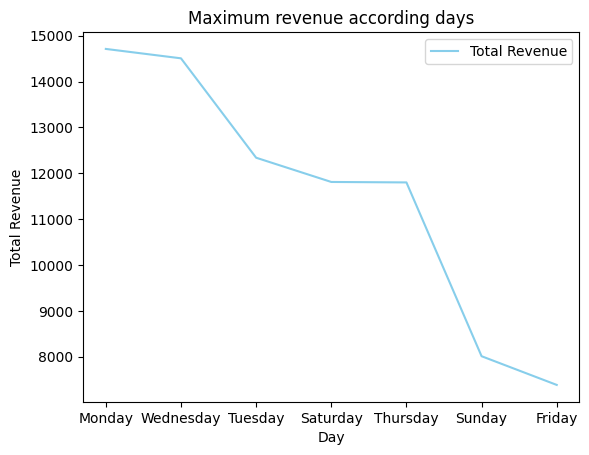

In [51]:
st.plot(kind='line', color=['skyblue'])
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.title('Maximum revenue according days')
plt.show()